In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:

IMAGE_SIZE = [224,224]

train_path = "Dataset-DR/train/"
 

In [3]:


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2,validation_split=0.15)
 
training_set = train_datagen.flow_from_directory(
        train_path,target_size=(224,224), batch_size=32,class_mode='categorical',
        subset='training')

validation_set = train_datagen.flow_from_directory(
        train_path,target_size=(224,224), batch_size=32,class_mode='categorical',shuffle = True,
        subset='validation')

Using TensorFlow backend.


Found 339 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


In [4]:


from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout

## We are initialising the input shape with 3 channels rgb and weights as imagenet and include_top as False will make to use our own custom inputs

mv = VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)



for layers in mv.layers:
    layers.trainable = False


# if u want to add more folders and train then change number 4 to 5 or 6 based on folders u have to train
x = Flatten()(mv.output)
prediction = Dense(5,activation='softmax')(x)



model = Model(inputs=mv.input,outputs=prediction)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________

In [5]:


import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<=0.05):
            print("\nEnding training")
            self.model.stop_training = True
# initiating the myCallback function
callbacks = myCallback()

In [6]:

## Let us compile the model with Adam optimizer and loss function categorical_crossentropy and metrics as categorical_accuracy
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])



In [7]:


history = model.fit(training_set,
                              validation_data=validation_set,
                              epochs=100,
                              verbse=1,
                              steps_per_epoch=len(training_set),
                              validations_steps=len(validation_set),
                              callbacks = [callbacks]
                             )


Epoch 1/100
11/11 [==============================] - 69s 6s/step - loss: 1.8780 - categorical_accuracy: 0.1770 - val_loss: 1.6951 - val_categorical_accuracy: 0.2373
Epoch 2/100
11/11 [==============================] - 77s 7s/step - loss: 1.6281 - categorical_accuracy: 0.2360 - val_loss: 1.6402 - val_categorical_accuracy: 0.2203
Epoch 3/100
11/11 [==============================] - 79s 7s/step - loss: 1.5927 - categorical_accuracy: 0.2596 - val_loss: 1.5724 - val_categorical_accuracy: 0.2881
Epoch 4/100
11/11 [==============================] - 81s 7s/step - loss: 1.5592 - categorical_accuracy: 0.3127 - val_loss: 1.5992 - val_categorical_accuracy: 0.2373
Epoch 5/100
11/11 [==============================] - 85s 8s/step - loss: 1.5598 - categorical_accuracy: 0.3274 - val_loss: 1.5752 - val_categorical_accuracy: 0.2542
Epoch 6/100
11/11 [==============================] - 85s 8s/step - loss: 1.5299 - categorical_accuracy: 0.3186 - val_loss: 1.5509 - val_categorical_accuracy: 0.3220
Epoch 7/10

11/11 [==============================] - 57s 5s/step - loss: 1.3022 - categorical_accuracy: 0.4808 - val_loss: 1.4331 - val_categorical_accuracy: 0.3220
Epoch 32/100
11/11 [==============================] - 57s 5s/step - loss: 1.2890 - categorical_accuracy: 0.5251 - val_loss: 1.4183 - val_categorical_accuracy: 0.3559
Epoch 33/100
11/11 [==============================] - 56s 5s/step - loss: 1.2890 - categorical_accuracy: 0.4985 - val_loss: 1.4695 - val_categorical_accuracy: 0.3220
Epoch 34/100
11/11 [==============================] - 56s 5s/step - loss: 1.2671 - categorical_accuracy: 0.5280 - val_loss: 1.4023 - val_categorical_accuracy: 0.4237
Epoch 35/100
11/11 [==============================] - 56s 5s/step - loss: 1.2504 - categorical_accuracy: 0.5398 - val_loss: 1.4386 - val_categorical_accuracy: 0.3051
Epoch 36/100
11/11 [==============================] - 57s 5s/step - loss: 1.2587 - categorical_accuracy: 0.5192 - val_loss: 1.3909 - val_categorical_accuracy: 0.3559
Epoch 37/100
11/1

11/11 [==============================] - 57s 5s/step - loss: 1.1644 - categorical_accuracy: 0.5605 - val_loss: 1.4972 - val_categorical_accuracy: 0.2712
Epoch 62/100
11/11 [==============================] - 58s 5s/step - loss: 1.1664 - categorical_accuracy: 0.5634 - val_loss: 1.3827 - val_categorical_accuracy: 0.4068
Epoch 63/100
11/11 [==============================] - 59s 5s/step - loss: 1.1343 - categorical_accuracy: 0.5487 - val_loss: 1.4208 - val_categorical_accuracy: 0.2881
Epoch 64/100
11/11 [==============================] - 57s 5s/step - loss: 1.1354 - categorical_accuracy: 0.5782 - val_loss: 1.3992 - val_categorical_accuracy: 0.3390
Epoch 65/100
11/11 [==============================] - 57s 5s/step - loss: 1.1227 - categorical_accuracy: 0.5900 - val_loss: 1.4502 - val_categorical_accuracy: 0.2373
Epoch 66/100
11/11 [==============================] - 57s 5s/step - loss: 1.0983 - categorical_accuracy: 0.6165 - val_loss: 1.4181 - val_categorical_accuracy: 0.3390
Epoch 67/100
11/1

11/11 [==============================] - 57s 5s/step - loss: 1.0440 - categorical_accuracy: 0.6372 - val_loss: 1.4564 - val_categorical_accuracy: 0.3390
Epoch 92/100
11/11 [==============================] - 57s 5s/step - loss: 1.0168 - categorical_accuracy: 0.6401 - val_loss: 1.4529 - val_categorical_accuracy: 0.3051
Epoch 93/100
11/11 [==============================] - 57s 5s/step - loss: 1.0449 - categorical_accuracy: 0.6519 - val_loss: 1.4616 - val_categorical_accuracy: 0.3051
Epoch 94/100
11/11 [==============================] - 57s 5s/step - loss: 1.0116 - categorical_accuracy: 0.6608 - val_loss: 1.4412 - val_categorical_accuracy: 0.2712
Epoch 95/100
11/11 [==============================] - 57s 5s/step - loss: 1.0207 - categorical_accuracy: 0.6549 - val_loss: 1.4453 - val_categorical_accuracy: 0.2881
Epoch 96/100
11/11 [==============================] - 57s 5s/step - loss: 1.0582 - categorical_accuracy: 0.6549 - val_loss: 1.3830 - val_categorical_accuracy: 0.3729
Epoch 97/100
11/1

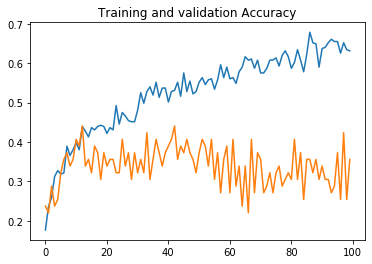

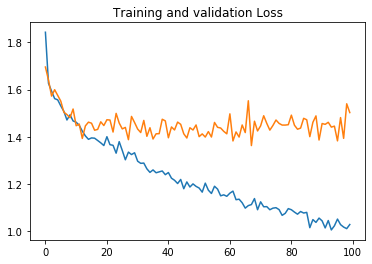

In [8]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("Training and validation Accuracy")
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("Training and validation Loss")
plt.show()

In [9]:
model.save("diabetic.h5")